___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://static.wixstatic.com/media/aa08c3_4431b1d1a196452bb094eb2f08d4c4eb.png/v1/fit/w_620%2Ch_277%2Cal_c/file.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://static.wixstatic.com/media/aa08c3_4431b1d1a196452bb094eb2f08d4c4eb.png/v1/fit/w_620%2Ch_277%2Cal_c/file.png</p>

### <font color= #2E9AFE> Tema: Regresión Lineal</font>

La regresión es una técnica de aprendizaje supervisado que busca encontrar relación entre variables. 
Un problema de regresión es cuando la variable de salida es discreta o continuar. 

**¿Qué vamos a ver?**
1. Qué es regresión?
2. Cuál es el promedio de la regresión lineal y cuál es la importancia de la regresión?
3. Impacto de distintos valores para la tasa de aprendizaje
4. Implementar en Python

**¿Qué es la regresión?**

La regresión muestra una línea o curva que pasa por todos los puntos de datos en un gráfico de tal manera que la distancia vertical entre los puntos de datos y la línea de regresión es la mínima. 

Se usa principalmente para predicción pero también es muy usada para determinar la relación causa-efecto de las variables. 

Si hay una sola variable de entrada (x), dicha regresión lineal se denomina *regresión lineal simple*. Y si hay más de una variable de entrada, dicha regresión lineal se denomina *regresión lineal múltiple*.


# Regresión Lineal Simple

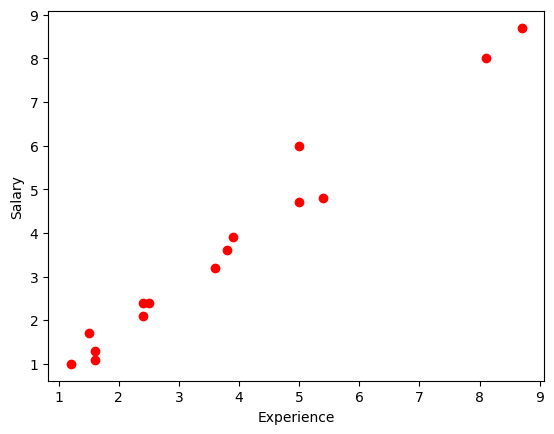

In [2]:
#Relación lineal positiva
import numpy as np
import matplotlib.pyplot as plt

experiencia= np.array([2.4,5.0,1.5,3.8,8.7,3.6,1.2,8.1,2.5,5,1.6,1.6,2.4,3.9,5.4])
salario = np.array([2.1,4.7,1.7,3.6,8.7,3.2,1.0,8.0,2.4,6,1.1,1.3,2.4,3.9,4.8])
n = np.size(salario)
plt.scatter(experiencia,salario, color = 'red')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

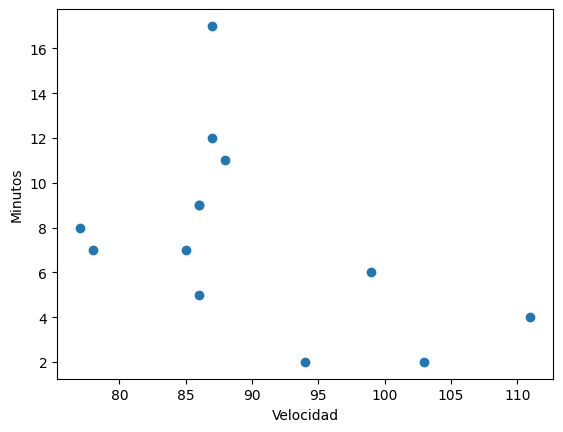

In [3]:
#Relacion lineal negativa
import matplotlib.pyplot as plt

Minutos = [6, 9, 12, 11, 4, 9, 2, 17, 2, 7, 8, 7, 5]
Velocidad = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]
plt.scatter(Velocidad, Minutos)
plt.xlabel("Velocidad")
plt.ylabel("Minutos")
plt.show()

El gráfico presenta la relación lineal entre la variable dependiente (Y) y la variables independiente (X). Cuando el valor de x aumenta, el valor de y disminuye. 

Para calcular la línea que mejor se ajusta, la regresión lineal usa la forma tradicional de pendiente e intercepto:
$$y=mx+b \rightarrow y=a_{0}+a_{1}x$$

- y= Variable dependiente
- x = Variable independiente
- $a_{0}$ = Intercepto de la línea (ordenada al origen)
- $a_{1}$ = Coeficiente de regresión lineal (pendiente)

In [4]:
#pip install scipy

In [5]:
#Aplicamos una regresión lineal usando la libreria de scipy con el fin de graficar la línea ajustada 
from scipy import stats
pendiente, intercepto, r, p, std_err = stats.linregress(experiencia, salario)


In [6]:
pendiente

1.0247464287610857

Interpretación:

Por cada año extra de experiencia, el salario aumenta 1.02

In [7]:
intercepto

-0.2135415007169046

Interpretación:

Si no hubiera experiencia, el salario es e -0.21

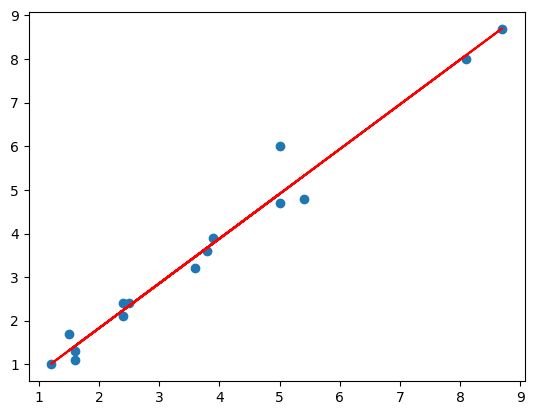

In [8]:
def linReg(x):
  return pendiente * x + intercepto

mymodel = list(map(linReg, experiencia))

plt.scatter(experiencia, salario)
plt.plot(experiencia, mymodel, 'r')
plt.show()

La línea roja se conoce como la línea recta de mejor ajuste. Con base en los puntos de datos dados, intentamos trazar una línea que modele mejor los puntos.

### Funcion de costo

La función de costo ayuda a determinar los mejores valores posibles para a0 (intercepto) y a1 (pendiente), lo que proporciona la línea de mejor ajuste para los puntos de datos.

La función de costo optimiza los coeficientes de regresión y mide cómo se está desempeñando un modelo de regresión lineal.

En la regresión lineal, se utiliza la función de costo del error cuadrático medio (MSE), que es el promedio del error cuadrático que se produjo entre los valores predichos y los valores reales.

$$MSE = \frac{1}{N}\sum_{i=1}^{n}(y_{i}-(mx_{i}+b))^{2}$$

### Gradiente Descendente

Es un método que va actualizando a0 y a1 para minimizar la función de costo (MSE). 

Un modelo de regresión usa el gradiente descendiente para actualizar los coeficientes de la línea al reducir la función de costo mediante una selección aleatoria de valores de coeficientes y luego actualizar iterativamente los valores para alcanzar la función de costo mínimo.

In [9]:
#test train split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(np.array(experiencia).reshape(-1, 1), salario, test_size = 0.3, random_state = 5)

#Inicializar el modelo
model = LinearRegression()

#Ajustar modelo a mis datos
model.fit(X_train, y_train)

#predecir datos del pasado
predicts = model.predict(X_test)

#MSE
print(mean_squared_error(y_test, predicts))

0.09640474566825234


In [10]:
#R^2 -> mientras más cercano al 1, mejor :)
r2_score(y_test, predicts)


0.9841917969191505

In [11]:
#Prediciendo cuánto debe ganar una persona con 20 años de experiencia
new_predicts = model.predict([[20]])

In [12]:
new_predicts

array([20.61444944])

# Regresión Lineal Múltiple

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [14]:
data = pd.read_csv('Advertising.csv',index_col='Unnamed: 0')

Este dataset contiene información sobre el número de anuncios que se hizo por diferentes medios (TV, Radio, Newspaper, Sales) y el total de ventas que hubo. 

In [15]:
#Vistazo a los datos
data.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [17]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


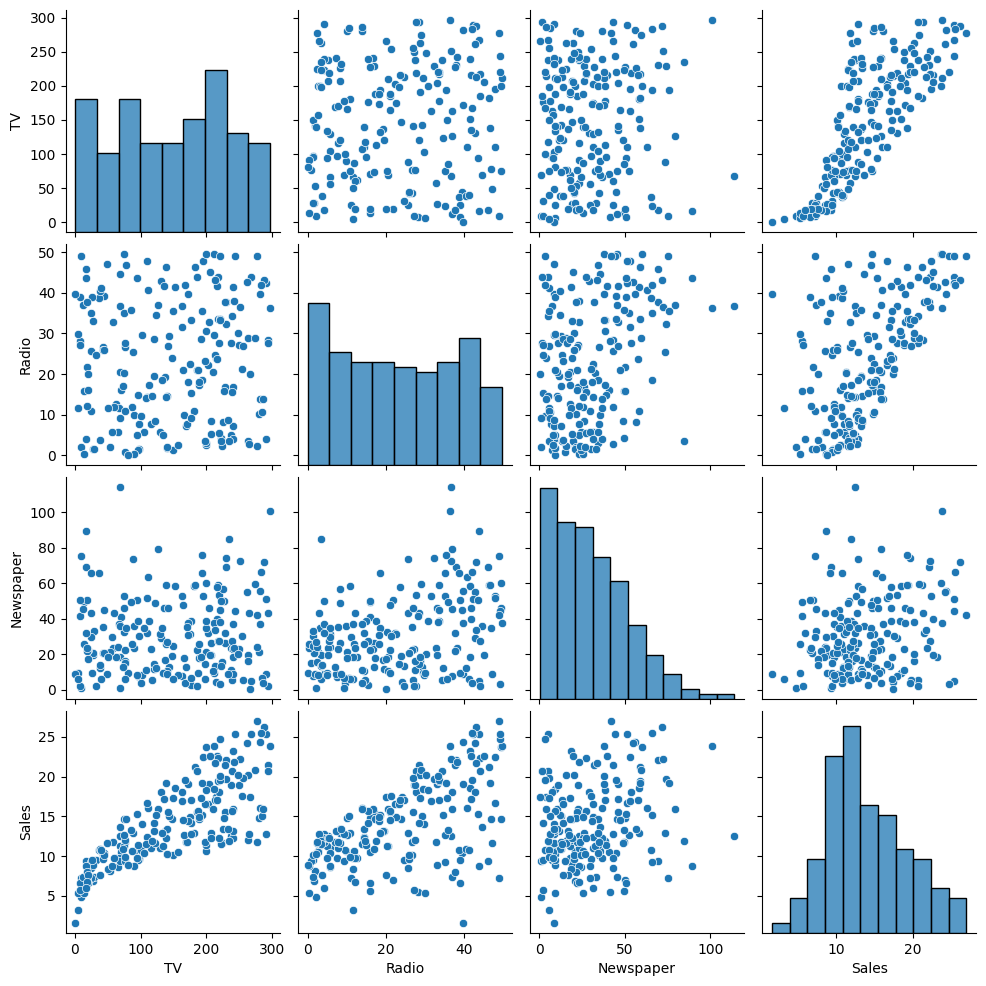

In [18]:
sns.pairplot(data)

## Supuestos de la regresión lineal

Cuando se cumplen las siguientes suposiciones, nos podemos asegurar que los resultados son confiables

1. Linealidad
2. No Multicolinealidad
3. Homoscedasticidad
4. Normalidad en los residuales

### Linealidad

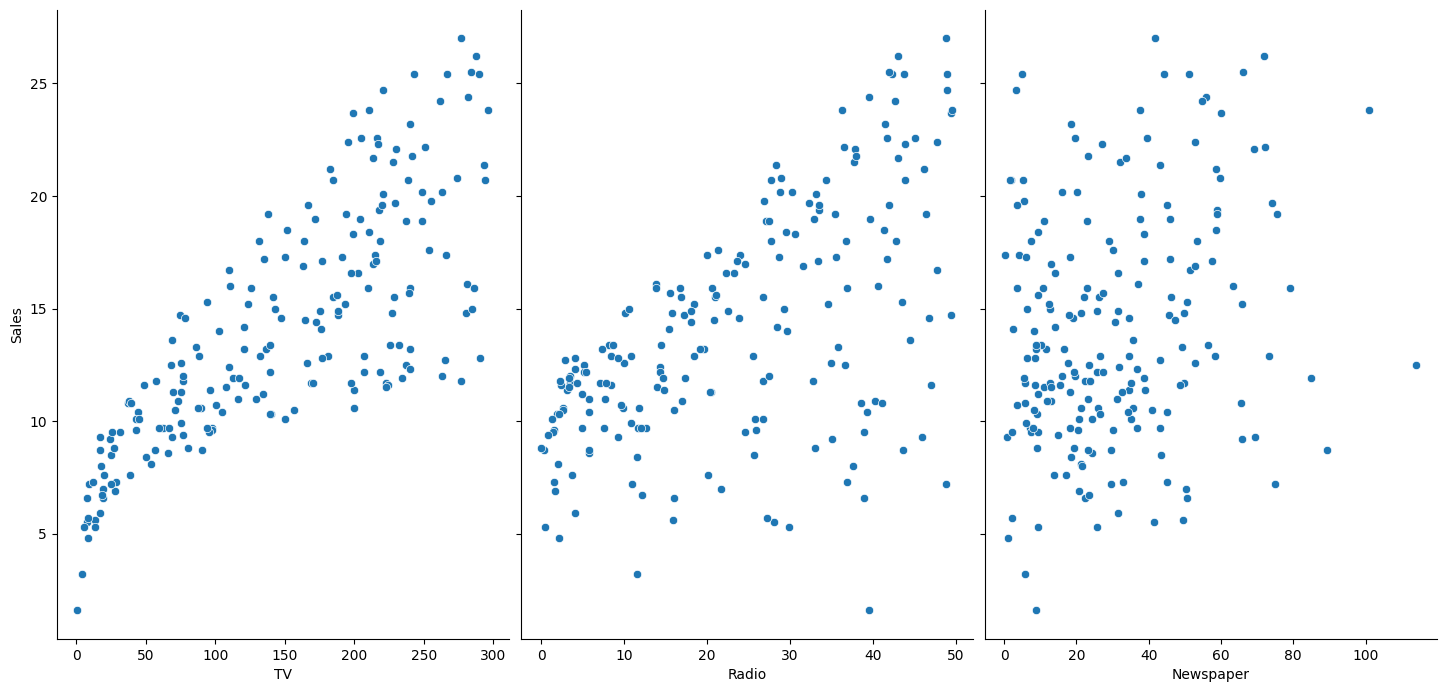

In [19]:
# Observar la relacion entre las variables independientes y la dependiente
p = sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7)

**Conclusion:**

Ahora el resto de los supuestos requieren que realicemos la regresión antes de que podamos verificarlos. Así que realicemos una regresión....

In [20]:
#Ajustamos un modelo lineal
x = data.drop(["Sales"],axis=1)
y = data.Sales

In [21]:
#Dividimos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 0,test_size=0.25)

In [22]:
#Escalamos los datos los datos
#Qué hacemos? normalizamos o estandarizamos?

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)


In [23]:
#Entrenamos el modelo

#Inicializamos el modelo
reg = LinearRegression()

#Entrenamos el modelo con los datos de entrenamiento
reg.fit(X_train_scaled,y_train)

#Predecimos con el modelo entrenado
y_pred = reg.predict(X_test_scaled)

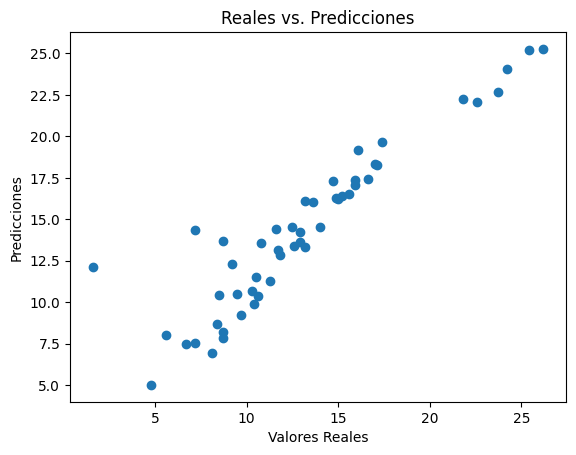

In [24]:
#graficamos las prediccions vs los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Reales vs. Predicciones")
plt.show()

### Homoscedasticidad

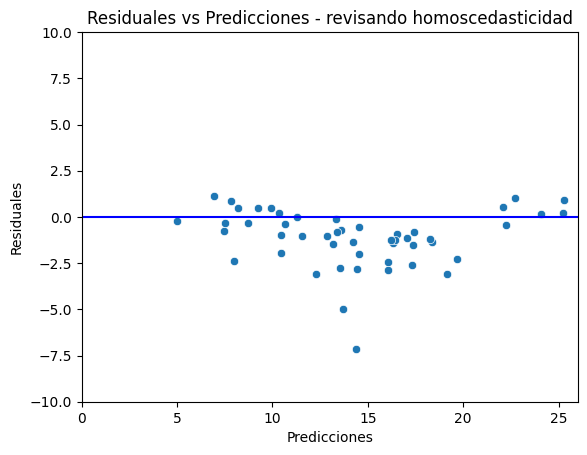

In [25]:
#buscamos patrones en los residuales. Si no hay patrones y están de forma aleatoria graficados entonces es bueno
residuales = y_test - y_pred
p = sns.scatterplot(x=y_pred, y=residuales)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot(x=[0,26],y=[0,0],color='blue')
p = plt.title('Residuales vs Predicciones - revisando homoscedasticidad')


### Normalidad de los residuales


In [26]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


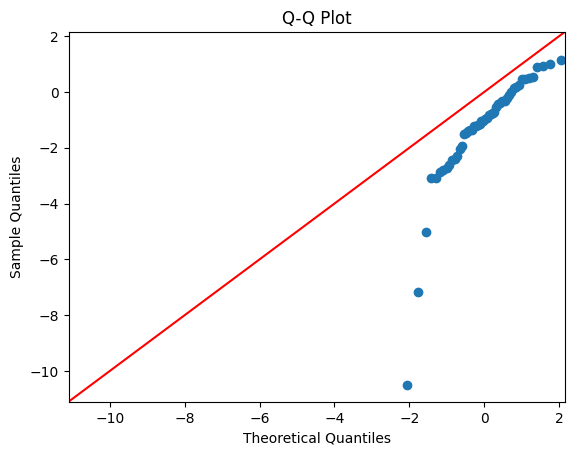

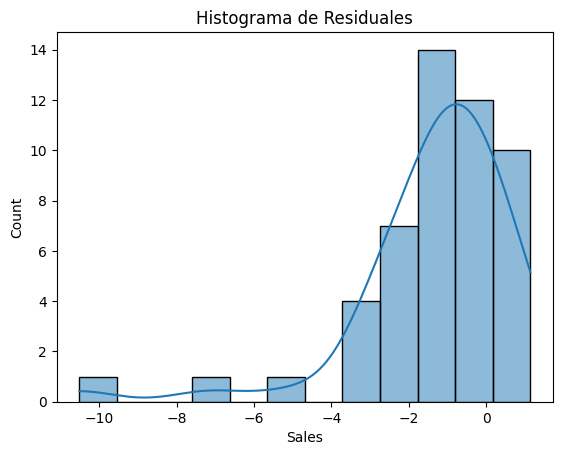

Shapiro-Wilk Test p-value: 5.060798903420894e-07


In [27]:
import statsmodels.api as sm
import scipy.stats as stats
sm.qqplot(residuales, line='45')
plt.title("Q-Q Plot")
plt.show()

# Alternativamente, usamos un histograma
sns.histplot(residuales, kde=True)
plt.title("Histograma de Residuales")
plt.show()

# Shapiro-Wilk test para la normalidad
shapiro_test = stats.shapiro(residuales)
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue}')


Se utiliza una prueba de Shapiro-Wilk para evaluar la normalidad de un conjunto de datos. La hipótesis nula (𝐻0) para la prueba de Shapiro-Wilk es que los datos se distribuyen normalmente.

La hipótesis alternativa (𝐻1) es que los datos no se distribuyen normalmente.

Este valor tan pequeño obtenido nos dice que se rechaza la hipótesis nula, por lo tanto los residuales no están distribuidos normalmente. 

### No multicolinealidad

En regresión, la multicolinealidad se refiere al grado en que las variables independientes están correlacionadas. 

La multicolinealidad afecta los coeficientes y los p-values, pero no influye en las predicciones, la precisión de las predicciones. 

**NOTA**: Si tu objetivo principal es hacer predicciones y no necesitas interpretar o entender el papel de cada variable independiente, no necesitas reducir la multicolinealidad severa.

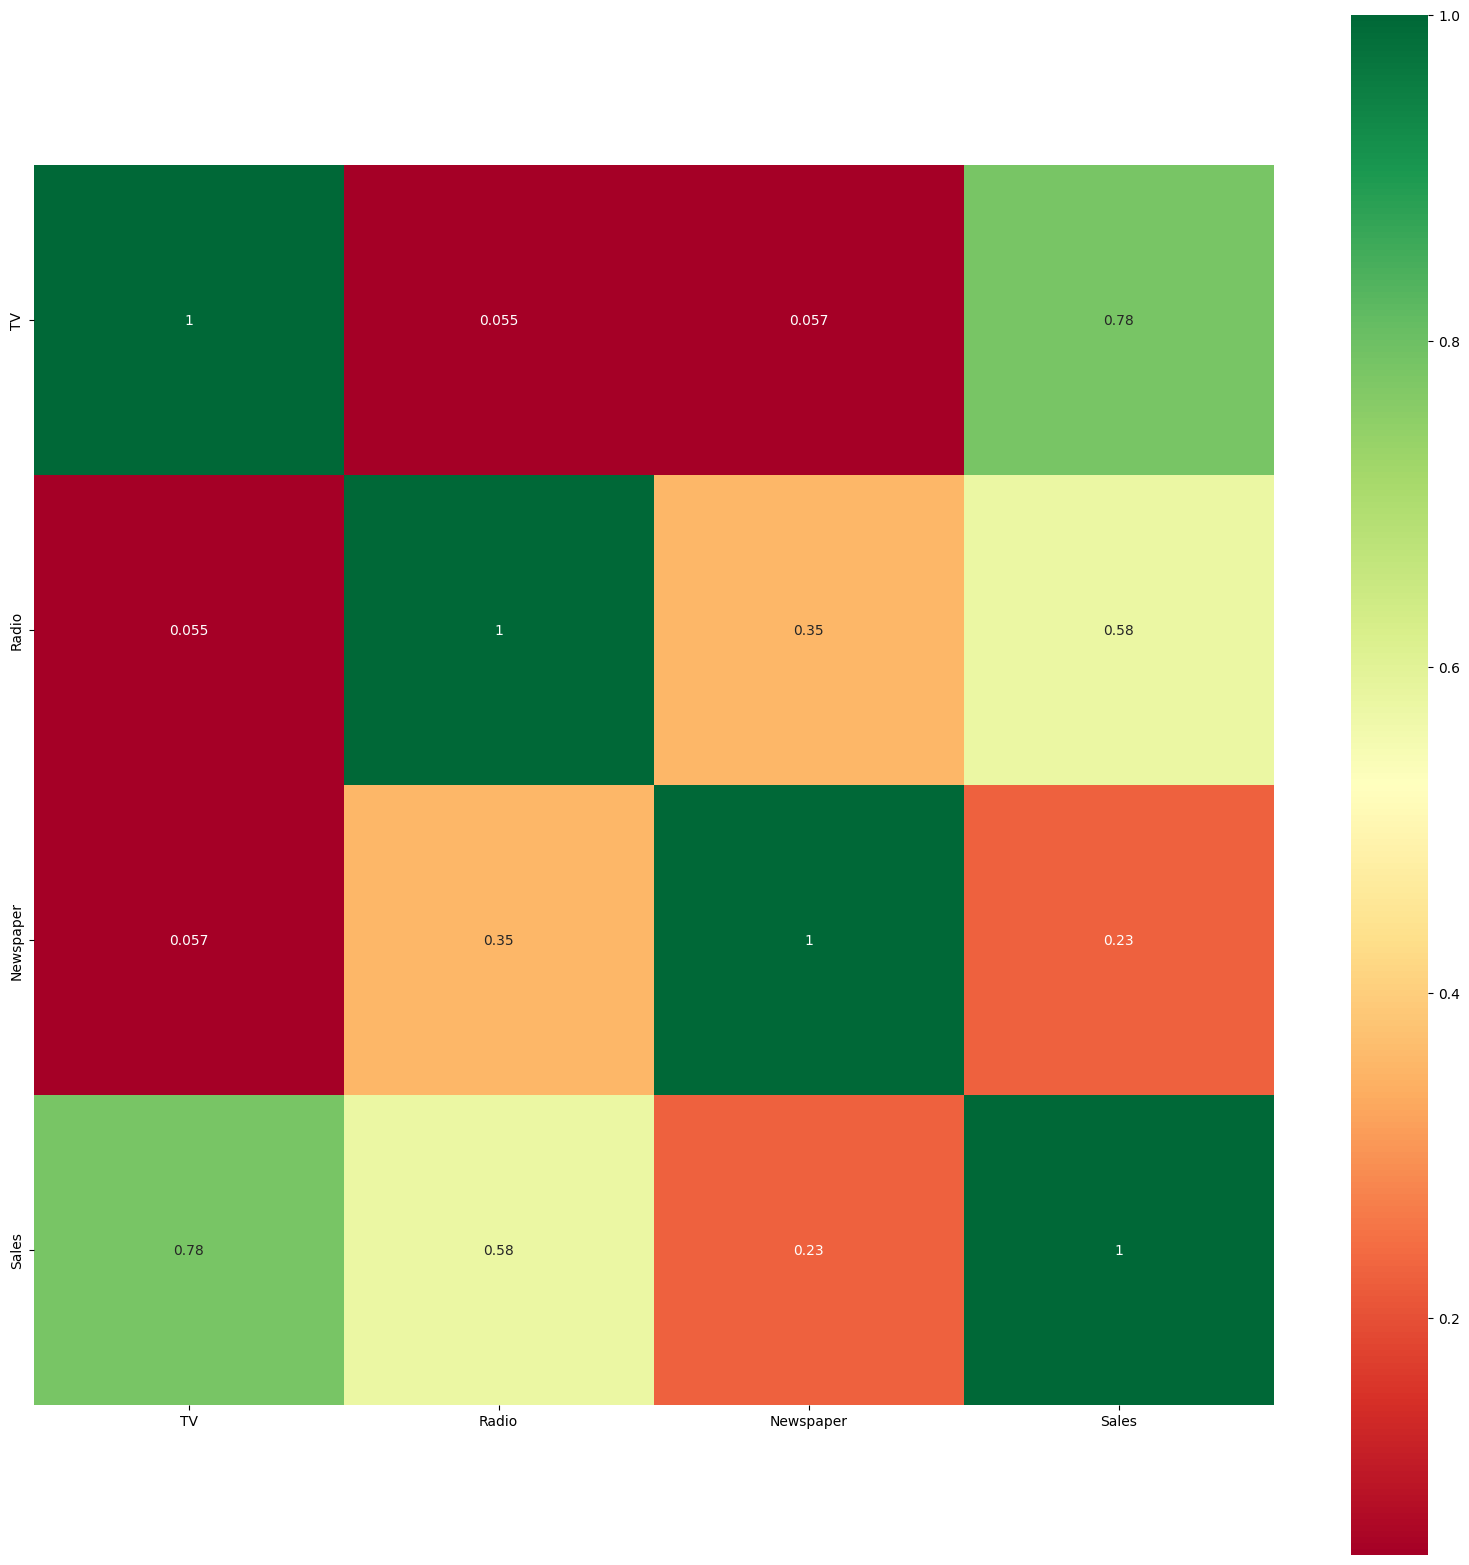

In [28]:
plt.figure(figsize=(20,20))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True)

La correlación dentro de las variables dependientes es lo que debemos buscar y evitar. 

Conclusion:


En caso de que hubiera alguna, intentaríamos eliminar una de las variables correlacionadas dependiendo de cuál fuera más importante para nuestro modelo de regresión.

### Evaluando el modelo


In [29]:
print(f"R^2: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

R^2: 0.7945620929698815
Mean Squared Error: 5.790370950349036


# Regularización

La regularización sirve como método para evitar que un modelo se sobreajuste.

El empleo de regularización ayuda a mitigar este problema al aumentar una penalización a la función de costo empleada en el entrenamiento del modelo.

1. El objetivo principal de la regularización es reducir la complejidad del modelo para hacerlo más generalizable a nuevos datos, mejorando así su rendimiento en conjuntos de datos no vistos anteriormente.

2. Existen varios tipos de técnicas de regularización:
- L1 (LASSO)
- L2 (Ridge)

3. La regularización modifica la función de costo agregando un término de regularización.

4. Elección del parámetro de regularización: La elección de λ (también conocido como parámetro de regularización) es crucial. Por lo general, se elige mediante cross-validation.

**¿Cómo funciona?**: agregando un término de penalización a la función de costo. 

Funcion de costo regularizada = Funcion de costo original + λ*Penalidad

**Balancear el overfitting y el underfitting**

Elegir el valor correcto de λ es crucial:

Un valor demasiado alto puede hacer que el modelo sea demasiado simple y no capture patrones importantes en los datos (underfitting).

Un valor demasiado bajo podría no penalizar suficientemente los coeficientes grandes, lo que llevaría a un modelo que captura demasiado ruido de los datos de entrenamiento (overfitting).

### Ridge Regression

La regresión de Ridge ayuda a reducir la Varianza al reducir el tamaño de los parámetros y haciendo que nuestras predicciones sean menos sensibles a los parámetros. 

$$Ridge = \sum_{i=1}^{n}(y_{i}-f(x_{i}))^{2}+\lambda\sum_{j=1}^{p}\beta_{j}^{2}$$

**¿Cuándo se recomienda usar?**
Sobre todo cuando tenemos pocos datos, ya que la regresión de Ridge mejora las predicciones hechas con nuevos datos (reduce la varianza), haciendo que las predicciones sean menos sensibles a los datos de entrenamiento. 

In [30]:
from sklearn.linear_model import Ridge

#inicializo modelo
model = Ridge(alpha=0.9)
#Entreno el modelo
model.fit(X_train_scaled,y_train)
#hago prediciones del test
y_pred = model.predict(X_test_scaled)

#metricas de performance
Mse = mean_squared_error(y_test, y_pred)
print("MSE", Mse)
r2 = r2_score(y_test, y_pred)
print("R2", r2)



MSE 5.79699124731549
R2 0.7943272099262271


#### LASSO Regularization

La ventaja de LASSO es que dentro de su proceso, hace que ciertos coeficientes se hagan cero y por lo tanto tiene un proceso de selección de variables interno. 

$$LASSO = \sum_{i=1}^{n}(y_{i}-f(x_{i}))^{2}+\lambda\sum_{j=1}^{p}|\beta_{j}|$$

In [31]:
from sklearn.linear_model import Lasso

#inicializo modelo
model = Lasso(alpha=.03)
#Entreno el modelo
model.fit(X_train_scaled,y_train)
#hago prediciones del test
y_pred = model.predict(X_test_scaled)

#metricas de performance
Mse = mean_squared_error(y_test, y_pred)
print("MSE", Mse)
r2 = r2_score(y_test, y_pred)
print("R2", r2)

MSE 5.779399512401999
R2 0.7949513511483777


In [32]:
# Ver los coeficientes del modelo
coefficients = model.coef_

# Imprimir los coeficientes
print("Coeficientes:", coefficients)

# Verificar cuántos coeficientes son cero
num_zero_coefficients = np.sum(coefficients == 0)
print("Número de coeficientes eliminados (coeficientes = 0):", num_zero_coefficients)

Coeficientes: [3.70052145 2.92225718 0.0041202 ]
Número de coeficientes eliminados (coeficientes = 0): 0


#### Cuándo utilizar Ridge?

1. Cuando tienes muchas variables predictoras (variables independientes). Cuando tienes gran número de variables y crees que muchas de ellas contribuyen al modelo. Ridge mantendrá todas las variables en el modelo, pero reducirá el impacto de aquellas que no son tan importantes.

2. Multicolinealidad: cuando dos o más variables predictoras están altamente correlacionadas entre sí. Ridge es útil en estos casos porque ayuda a distribuir los pesos de manera más equitativa entre las variables correlacionadas, evitando que algunas se vuelvan demasiado influyentes.

3. Minimizar el Error de Predicción: Si el objetivo es simplemente minimizar el error de predicción sin necesidad de interpretar los coeficientes, Ridge puede ser una buena opción, ya que tiende a ser más estable en cuanto a la varianza de los coeficientes.


#### Cuándo utilizar LASSO?

1. Seleccionar variables: Cuando sospechas que solo algunas variables son realmente importantes

2. Modelo sencillo e interpretable: Si quieres un modelo más simple y fácil de interpretar

3. Dataset con más variables que observaciones


#### Cuándo utilizar la regularización?

1. Prevenir el sobreajuste. Cuando tienes un modelo con muchas variables
2. Variables correlacionadas. 
3. Datos con alta varianza. La regularización puede ayudar a estabilizar los coeficientes del modelo. 


#### Cuándo no utilizar la regularización?

1. Si tienes muchos datos y puedes permitirte un modelo más complejo sin preocuparte tanto por el overfitting
2. Cuando la interpretabilidad es crucial y todas las variables son importantes. 